# STEAP

This notebook shows how the figures and tables were made.

#### Imports

In [1]:
# quick/dirty method to allow importing by changing working directory
import os
os.chdir("../")
os.getcwd()

'/home/eerdem/STEAP'

In [2]:
import constants # all constants used here can be found and edited in the constants.py file
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.patches as mpatches


# from scripts import convert_output_to_dataframe
# from scripts import gene_set_enrichment_analysis
# from scripts import calculate_beta_correlation
# from scripts import calculate_es_correlation
from scripts import upsetplot
from scripts import circosplot

In [3]:
figure_dir = 'figures_and_tables/'

In [4]:
methods = constants.METHODS
pval_correction = constants.PVAL_CORRECTION
gwas_group_dict = constants.GWAS_GROUP_DICT

In [5]:
df_all = pd.read_hdf('data/CELLECT_output/data.h5', 'df_all')
corr_df = pd.read_hdf('data/CELLECT_output/data.h5', 'corr_df')
es_corr_df = pd.read_hdf('data/CELLECT_output/data.h5', 'es_corr_df')
display(df_all)
display(corr_df)
display(es_corr_df)

,gwas,specificity_id,annotation,beta,beta_se,pvalue,method,n_methods,pvalue_bonferroni
0,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_CTXN3,-0.174645,0.089013,0.975106,H-MAGMA,3,1.0
1,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_LAMP5,-0.123540,0.071732,0.957472,H-MAGMA,3,1.0
2,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_NTRK1,-0.269440,0.088436,0.998840,H-MAGMA,3,1.0
3,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_TRPC4,-0.246886,0.099982,0.993223,H-MAGMA,3,1.0
4,AD_JANSENS2019,Allen_human_LGN,Glutamatergic.LGN_Exc_BTNL9,-0.421298,0.133637,0.999188,H-MAGMA,3,1.0
...,...,...,...,...,...,...,...,...,...
879625,volume: thalamus,tabula_muris,Tongue.keratinocyte,-0.035636,0.045386,0.783817,MAGMA,3,1.0
879626,volume: thalamus,tabula_muris,Trachea.blood_cell,-0.102483,0.059198,0.958279,MAGMA,3,1.0
879627,volume: thalamus,tabula_muris,Trachea.endothelial_cell,-0.114722,0.055573,0.980498,MAGMA,3,1.0
879628,volume: thalamus,tabula_muris,Trachea.epithelial_cell,-0.102770,0.052743,0.974312,MAGMA,3,1.0


,gwasx,gwasy,corr,pval,method
0,AD_JANSENS2019,ASD_2019,-0.220065,2.278355e-07,H-MAGMA
1,AD_JANSENS2019,BIP_PGC3,-0.122407,4.318468e-03,H-MAGMA
2,AD_JANSENS2019,BMI_GIANT2018,-0.007513,8.614700e-01,H-MAGMA
3,AD_JANSENS2019,DTI AD: ACR,0.247713,5.065423e-09,H-MAGMA
4,AD_JANSENS2019,DTI AD: ALIC,0.234532,3.299649e-08,H-MAGMA
...,...,...,...,...,...
144448,volume: caudate,volume: putamen,0.337825,6.184427e-16,MAGMA
144449,volume: caudate,volume: thalamus,0.351890,3.040520e-17,MAGMA
144450,volume: pallidum,volume: putamen,0.256756,1.313908e-09,MAGMA
144451,volume: pallidum,volume: thalamus,0.310798,1.330849e-13,MAGMA


,celltypex,celltypey,corr,pval,pval_bonferroni
0,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_LAMP5",0.155456,3.503827e-15,5.194074e-10
1,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_NTRK1",0.360667,1.160120e-115,1.719762e-110
2,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_TRPC4",0.209286,6.473715e-26,9.596634e-21
3,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, Glutamatergic.LGN_Exc_BTNL9",0.159302,1.347408e-09,1.997397e-04
4,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, Glutamatergic.LGN_Exc_PRKCG_BCHE",0.246957,1.938275e-24,2.873299e-19
...,...,...,...,...,...
148235,"tabula_muris, Trachea.blood_cell","tabula_muris, Trachea.epithelial_cell",0.079243,1.409471e-02,1.000000e+00
148236,"tabula_muris, Trachea.blood_cell","tabula_muris, Trachea.mesenchymal_cell",0.111152,1.375545e-07,2.039108e-02
148237,"tabula_muris, Trachea.endothelial_cell","tabula_muris, Trachea.epithelial_cell",0.089872,9.832454e-04,1.000000e+00
148238,"tabula_muris, Trachea.endothelial_cell","tabula_muris, Trachea.mesenchymal_cell",0.149082,1.478933e-18,2.192370e-13


## Figure 1

In [ ]:
# venn diagram of shared significant annotations between methods
plt.style.use('default')

df_3m = df_all[(df_all['n_methods']==3)& # only get if analysed in all 3 methods
               (df_all[f'pvalue_{pval_correction}']<=0.05)] # only significant
df_3m = df_3m.groupby(['gwas','specificity_id','annotation'])['method'].agg(list).reset_index()
df_3m = df_3m['method'].value_counts().reset_index()
for m in methods:
    df_3m[m] = df_3m['index'].apply(lambda x : m in x)
df_3m.drop(columns='index', inplace=True)
# this list needs this specific order for the venn subsets
true_false_list = [
    (True,False,False),
    (False,True,False),
    (True,True,False),
    (False,False,True),
    (True,False,True),
    (False,True,True),
    (True,True,True)
]
venn_values = []
for a,b,c in true_false_list:
    venn_values.append(
        df_3m[(df_3m[methods[0]]==a)&(df_3m[methods[1]]==b)&(df_3m[methods[2]]==c)]['method'].values[0]
    )

v = venn3(subsets = venn_values, 
          set_labels = (methods))
# change the colors...
# v.get_patch_by_id('100').set_color('#4A148C')
# v.get_patch_by_id('110').set_color('#9C27B0')
# v.get_patch_by_id('010').set_color('#CE93D8')
# v.get_patch_by_id('001').set_color('#9C27B0')
# v.get_patch_by_id('011').set_color('#4A148C')
# v.get_patch_by_id('111').set_color('#')
plt.savefig(f"{figure_dir}venn_diagram.png", dpi=200, bbox_inches='tight')
plt.show()

## Figure 2

In [ ]:
gwas_group_dict['Schizophrenia'] = ['SCZ_PGC3']

In [ ]:
upsetplot.plot_upset(df_all,
                     gwas_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=56,
                     save=True, filename=f"{figure_dir}upsetplot_main.png")

upsetplot.get_shared_celltypes(df_all,
                               gwas_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_main.xlsx")

## Figure 3

In [ ]:
mri_group_dict = {
    'Volume' : ['volume'],
    'Surface Area' : ['surface area'],
    'Thickness' : ['thickness']
}
upsetplot.plot_upset(df_all, 
                     mri_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70,
                     save=True, filename=f"{figure_dir}upsetplot_structural_mri.png"
                    )

upsetplot.get_shared_celltypes(df_all,
                               mri_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_structural_mri.xlsx")

## Figure 4

In [ ]:
dti_group_dict = {
    'FA' : ['DTI FA'],
    'MD' : ['DTI MD'],
    'AD' : ['DTI AD'],
    'RD' : ['DTI RD'],
    'MO' : ['DTI MO'],
#     'PC1' : ['DTI PC1'],
#     'PC2' : ['DTI PC2'],
#     'PC3' : ['DTI PC3'],
#     'PC4' : ['DTI PC4'],
#     'PC5' : ['DTI PC5'], 
}
upsetplot.plot_upset(df_all, 
                     dti_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70, sort_by='degree',
                     sort_categories_by=None, # None will sort based on the key order in the group_dict
                     save=True, filename=f"{figure_dir}upsetplot_dti.png"
                    )

upsetplot.get_shared_celltypes(df_all,
                               dti_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_dti.xlsx")

## Figure 5

In [ ]:
dti_group_dict = {
    'FA' : ['DTI FA'],
    'MD' : ['DTI MD'],
    'AD' : ['DTI AD'],
    'RD' : ['DTI RD'],
    'MO' : ['DTI MO'],
    'PC1' : ['DTI PC1'],
    'PC2' : ['DTI PC2'],
    'PC3' : ['DTI PC3'],
    'PC4' : ['DTI PC4'],
    'PC5' : ['DTI PC5'], 
}
upsetplot.plot_upset(df_all, 
                     dti_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70, sort_by='degree',
                     sort_categories_by=None, # None will sort based on the key order in the group_dict
                     save=True, filename=f"{figure_dir}upsetplot_dti_w_pc.png"
                    )

upsetplot.get_shared_celltypes(df_all,
                               dti_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_dti_w_pc.xlsx")

## Figure 6

In [ ]:
fmri_group_dict = {
    'Node': ['Node'],
    'Pair': ['Pair'],
    'Edge': ['Edge']
}
upsetplot.plot_upset(df_all, 
                     fmri_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70, sort_by='degree',
                     sort_categories_by=None, # None will sort based on the key order in the group_dict
                     save=True, filename=f"{figure_dir}upsetplot_fmri.png"
                    )

upsetplot.get_shared_celltypes(df_all,
                               fmri_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_fmri.xlsx")

## Figure 7

In [ ]:
gwas = "SCZ_PGC3_2020"
gwas_name = "Schizophrenia"

plt.style.use('seaborn')
def explode_column(df, column, split_str=','):
    df = df.set_index(
            df.drop([column],axis=1).columns.to_list()
        )[[column]].apply(lambda x: x.str.split(',').explode()).reset_index()
    df[column] = df[column].str.strip()
    return df

ylab = ["Class", "Developmental_compartment", "Neurotransmitter","Region"]
heights = [3,3,4,9]

#use mousebrain metadata
file = f"{figure_dir}mousebrain_celltype_metadata.csv"
mb_metadata_df = pd.read_csv(file)
mb_metadata_df['Neurotransmitter'].replace("(\w+) (\(\w+),\s*(\w+\))",r"\1 \2), \1 (\3",
                                        regex=True, inplace=True) #to fix wrong explode
mb_metadata_df['Type'] = 'All'
df_gwas = df_all[(df_all['gwas']==gwas)
                &
                 (df_all['specificity_id']=='mousebrain')
                 &
                 (df_all[f"pvalue_{pval_correction}"]<=0.05)
                ]

df_gwas = df_gwas.groupby(['specificity_id','annotation']).size().reset_index().rename(columns={0:'N_methods'})
annot_list = df_gwas[df_gwas['N_methods']>=len(methods)-1].annotation.to_list()
mb_metadata_df.loc[mb_metadata_df.ClusterName.isin(annot_list), 'Type'] = gwas

fig = plt.figure(figsize=(8,8))
ax_position = [321,323,325,122]
for pos,y in zip(ax_position,ylab):
    ax = fig.add_subplot(pos)
    df = explode_column(mb_metadata_df,y)
    df[[y,'Type']].groupby([y,'Type']).size().reset_index()\
    .pivot_table(values=0, index=y, columns='Type').sort_values(y, ascending=False).plot.barh(
        stacked=True, legend=False, ax=ax)
    ax.set_ylabel('')
    ax.set_title(y.replace('_',' '))
# plt.suptitle(gwas)
plt.legend(['__',f"{gwas_name}"])
fig.text(0.5, -0.0, 'Count', ha='center')
plt.tight_layout()
plt.savefig(f"{figure_dir}mousebrain_{gwas_name}.png", dpi=200, bbox_inches='tight')
plt.show()


## Figure 8

In [6]:
# genetic correlation on a subset of phenotypes was performed using ldsc
genetic_correlation_dir = f"{figure_dir}/genetic_correlation_out/"
columns = ['p1','p2','rg','se','z','p','h2_obs','h2_obs_se','h2_int','h2_int_se','gcov_int','gcov_int_se']
data = []
for file in Path(genetic_correlation_dir).iterdir():
    with open(file,'r') as f:
        lines = f.readlines()
        for linenumber,line in enumerate(lines):
            if line.startswith('p1'):
                d = (lines[linenumber+1]).strip().split()
                d[0] = d[0].split('/')[-1].split('.')[0]
                d[1] = d[1].split('/')[-1].split('.')[0]
                data.append(d)
                break
df = pd.DataFrame(data, columns=columns).replace('NA',np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
display(df)

,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,model1d_precentral_SAMPLESIZE,ukb_phase1to3_fapcs_dec21_2019_pheno15,-0.1285,0.0990,-1.2977,1.944000e-01,0.1053,0.0185,0.9963,0.0072,0.0095,0.0046
1,ukb_phase1to3_fmri_node_dec21_2019_pheno17,ukb_phase1to3_dti441_dec21_2019_pheno39,-0.0062,0.0674,-0.0924,9.264000e-01,0.2905,0.0254,1.0249,0.0092,-0.0060,0.0055
2,ukb_phase1to3_fmri_node_dec21_2019_pheno15,ukb_phase1to3_fmri_edge_dec21_2019_pheno681,0.3058,0.1136,2.6916,7.100000e-03,0.0546,0.0141,0.9994,0.0064,0.2113,0.0049
3,ukb_phase1to3_fmri_node_dec21_2019_pheno35,ukb_phase1to3_fapcs_dec21_2019_pheno5,-0.0664,0.1032,-0.6438,5.197000e-01,0.1335,0.0171,0.9913,0.0068,0.0140,0.0047
4,ukb_phase1to3_fmri_edge_dec21_2019_pheno767,ukb_phase1to3_fmri_edge_dec21_2019_pheno908,-0.0505,0.2348,-0.2150,8.298000e-01,0.0337,0.0140,1.0021,0.0063,0.0219,0.0045
...,...,...,...,...,...,...,...,...,...,...,...,...
5990,ukb_phase1to3_fmri_edge_dec21_2019_pheno683,ukb_phase1to3_dti441_dec21_2019_pheno427,-0.1219,0.1018,-1.1972,2.312000e-01,0.2700,0.0273,1.0172,0.0083,-0.0091,0.0046
5991,ukb_phase1to3_fapcs_dec21_2019_pheno71,ukb_phase1to3_fapcs_dec21_2019_pheno86,0.5410,0.0420,12.8705,6.600000e-38,0.2382,0.0240,1.0140,0.0082,0.4482,0.0063
5992,fixed_amygdala_MEGAMETA_Z1,ukb_phase1to3_fmri_edge_dec21_2019_pheno405,0.1811,0.1424,1.2721,2.033000e-01,0.1141,0.0167,0.9923,0.0072,-0.0023,0.0044
5993,model1b_cuneus_SAMPLESIZE,ukb_phase1to3_fapcs_dec21_2019_pheno61,-0.1541,0.0858,-1.7955,7.260000e-02,0.2929,0.0244,1.0251,0.0085,-0.0206,0.0051


In [7]:
# the cell type correlation uses different names for the same phenotypes
# so first we will convert these names so we can compare them
phenotypes_cort = {
                "Frontal": ["superiorfrontal", "rostralmiddlefrontal", "caudalmiddlefrontal", "parsopercularis", "parstriangularis","parsorbitalis", "lateralorbitofrontal", "medialorbitofrontal", "precentral", "paracentral", "frontalpole"],
                "Temporal": ["superiortemporal", "middletemporal", "inferiortemporal", "bankssts", "fusiform", "transversetemporal","entorhinal", "temporalpole", "parahippocampal"],
                "Parietal": ["superiorparietal", "inferiorparietal", "supramarginal", "postcentral", "precuneus"  ],
                "Occipital": ["lateraloccipital", "lingual", "cuneus", "pericalcarine"],
                "Cingulate": ["rostralanteriorcingulate", "caudalanteriorcingulate", "posteriorcingulate", "isthmuscingulate"],
                "Insula": ["insula"],  
                "Cortex": ['cortex']
                }
model_cort = {
        "model1a": "surface area",
        "model1b": "cortical thickness (adjusted)",
        "model1c": "cortical thickness",
        "model1d": "volume" 
        }
inv_map_pheno = {v:k for k,v_list in phenotypes_cort.items() for v in v_list}
p_df = pd.concat([df['p1'],df['p2']])
df_cort = p_df[p_df.str.contains('model1\w_\w+')].copy()
keys_cortical = df_cort.unique().tolist()
df_cort = df_cort.str.extract('(model1\w)_(\w+)_\w+')
df_cort[0] = df_cort[0].apply(lambda x: model_cort[x])
df_cort[2] = df_cort[1].apply(lambda x: inv_map_pheno[x])
values_cortical = (df_cort[0]+': '+df_cort[2]+'.'+df_cort[1]).values.tolist()
cortical_dict = {k:v for k,v in zip(keys_cortical,values_cortical)}

df_dti = p_df[p_df.str.contains('dti|fapc')].copy()
keys_dti = df_dti.unique().tolist()
meta_dti = pd.read_csv('gwas/DTI.csv', usecols=[0,1])
meta_dti[['type','pheno']] = meta_dti['assoc_files'].str.extract(r'_(\w+)_(pheno\d+)', expand=True)
df_dti = df_dti.str.extract('ukb_phase1to3_(\w+)_dec21_2019_(\w+)').replace({'fapcs':'fpc','dti441':'mean'})
df_dti = df_dti.merge(meta_dti, right_on=['type','pheno'], left_on=[0,1]).drop_duplicates()
df_dti[['region','param']] = df_dti['phenocode'].str.split('_', expand=True)
values_dti = ('DTI '+df_dti['param']+': '+df_dti['region']).values.tolist()
dti_dict = {k:v for k,v in zip(keys_dti,values_dti)}

df_subcor = p_df[p_df.str.contains('fixed_\w+_MEGAMETA')].copy()
keys_subcortical = df_subcor.unique().tolist()
values_subcortical = ('volume: '+df_subcor.str.extract(r'fixed_(\w+)_MEGAMETA')).values.flatten().tolist()
subcortical_dict = {k:v for k,v in zip(keys_subcortical,values_subcortical)}

hipp_dict = {'ukb_roi_volume_may12_2019_phase1and2_pheno81_allchr_withA2':'volume: Hippocampus.left',
             'ukb_roi_volume_may12_2019_phase1and2_pheno94_allchr_withA2':'volume: Hippocampus.right'
            }

df_rsfmri = p_df[p_df.str.contains('fmri')].copy()
keys_rsfmri = df_rsfmri.unique().tolist()
rsfmri_metafile = "gwas/fMRI.csv"
rsfmri_metadata = pd.read_csv(rsfmri_metafile)
rsfmri_metadata[['type','pheno']] = rsfmri_metadata['assoc_files'].str.extract('fmri_(\w+)_(pheno\d+)', expand=True)
df_rsfmri = df_rsfmri.str.extract('fmri_(\w+)_dec21_2019_(pheno\d+)')
values_rsfmri = df_rsfmri.merge(rsfmri_metadata, left_on=[0,1], right_on=['type','pheno']).drop_duplicates()['phenocode'].values.tolist()
rsfmri_dict = {k:v for k,v in zip(keys_rsfmri,values_rsfmri)}

others_dict = {'ASD_iPSYCH-PGC_ASD_Nov2017':'ASD_2019',
               'PGC_UKB_depression2019':'PGC_depression2019',
               'SCZ_clozuk_pgc2':'SCZ_2016',
               'CHARGE-ENIGMA-HV-METAANALYSIS':'HV_2016'    
}

merged_dict = {**cortical_dict,**dti_dict,**subcortical_dict,**rsfmri_dict,**hipp_dict,**others_dict}

def replace_name(name):
    if name in merged_dict.keys():
        return merged_dict[name]
    else:
        return name
    
df['p1'] = df['p1'].apply(replace_name)
df['p2'] = df['p2'].apply(replace_name)
display(df)

,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,volume: Frontal.precentral,DTI PC5: BCC,-0.1285,0.0990,-1.2977,1.944000e-01,0.1053,0.0185,0.9963,0.0072,0.0095,0.0046
1,Net25_Node17,DTI FA: PLIC,-0.0062,0.0674,-0.0924,9.264000e-01,0.2905,0.0254,1.0249,0.0092,-0.0060,0.0055
2,Net25_Node15,Net100_Pair6_32,0.3058,0.1136,2.6916,7.100000e-03,0.0546,0.0141,0.9994,0.0064,0.2113,0.0049
3,Net100_Node14,DTI PC5: ACR,-0.0664,0.1032,-0.6438,5.197000e-01,0.1335,0.0171,0.9913,0.0068,0.0140,0.0047
4,Net100_Pair29_34,Net100_Pair32_38,-0.0505,0.2348,-0.2150,8.298000e-01,0.0337,0.0140,1.0021,0.0063,0.0219,0.0045
...,...,...,...,...,...,...,...,...,...,...,...,...
5990,Net100_Pair8_32,DTI RD: SCR,-0.1219,0.1018,-1.1972,2.312000e-01,0.2700,0.0273,1.0172,0.0083,-0.0091,0.0046
5991,DTI PC1: RLIC,DTI PC1: SFO,0.5410,0.0420,12.8705,6.600000e-38,0.2382,0.0240,1.0140,0.0082,0.4482,0.0063
5992,volume: amygdala,Net100_Pair5_21,0.1811,0.1424,1.2721,2.033000e-01,0.1141,0.0167,0.9923,0.0072,-0.0023,0.0044
5993,cortical thickness (adjusted): Occipital.cuneus,DTI PC1: PLIC,-0.1541,0.0858,-1.7955,7.260000e-02,0.2929,0.0244,1.0251,0.0085,-0.0206,0.0051


In [8]:
# check which phenotype has not had their name changed
for key in df['p1'].unique().tolist():
    if key not in merged_dict.values():
        print(key)
# these phenotypes have the same name in the cell type correlation dataframe so no further renaming is needed

SCZ_2014
BIP_PGC3
AD_JANSENS2019
SCZ_PGC3_2020
InstantCoffee_2019
BMI_GIANT2018


In [9]:
gc_corr_sorted = df[['p1','p2','rg','p']].copy() # genetic correlation
ct_corr_sorted = corr_df.copy() # cell type correlation

# sort the p1/gwasx and p2/gwasy alphabetically so we can easily merge them
gc_corr_sorted[['p1','p2']] = gc_corr_sorted.apply(
    lambda x: sorted([x[0],x[1]]),
    result_type='expand', axis=1
)
ct_corr_sorted[['gwasx','gwasy']] = ct_corr_sorted.apply(
    lambda x: sorted([x[0],x[1]]),
    result_type='expand', axis=1
)

In [10]:
merged_corr = gc_corr_sorted.merge(ct_corr_sorted, right_on=['gwasx','gwasy'],
                                   left_on=['p1','p2']).drop(columns=['p1','p2'])
display(merged_corr)

,rg,p,gwasx,gwasy,corr,pval,method
0,-0.1285,0.1944,DTI PC5: BCC,volume: Frontal.precentral,0.154898,2.949292e-04,H-MAGMA
1,-0.1285,0.1944,DTI PC5: BCC,volume: Frontal.precentral,0.121581,4.589675e-03,LDSC
2,-0.1285,0.1944,DTI PC5: BCC,volume: Frontal.precentral,0.185976,1.314004e-05,MAGMA
3,-0.0062,0.9264,DTI FA: PLIC,Net25_Node17,0.306119,3.195063e-13,H-MAGMA
4,-0.0062,0.9264,DTI FA: PLIC,Net25_Node17,0.011030,7.978017e-01,LDSC
...,...,...,...,...,...,...,...
17869,-0.1541,0.0726,DTI PC1: PLIC,cortical thickness (adjusted): Occipital.cuneus,0.193480,5.708248e-06,LDSC
17870,-0.1541,0.0726,DTI PC1: PLIC,cortical thickness (adjusted): Occipital.cuneus,0.376737,1.013547e-19,MAGMA
17871,0.0097,0.8960,DTI PC5: FXST,Net100_Pair28_44,0.066866,1.199817e-01,H-MAGMA
17872,0.0097,0.8960,DTI PC5: FXST,Net100_Pair28_44,0.100296,1.951874e-02,LDSC


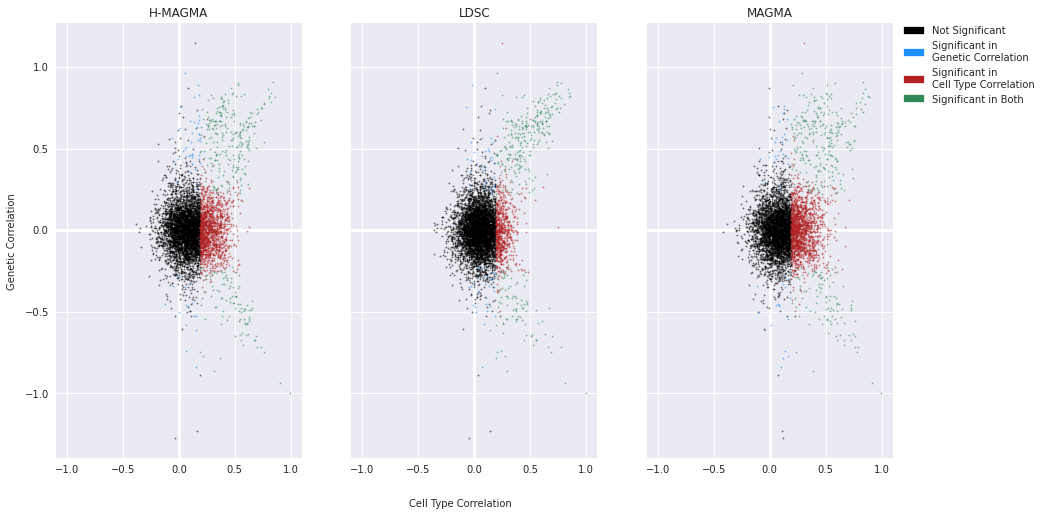

In [28]:
plt.style.use('seaborn')
fig, axes = plt.subplots(1,3,figsize=(15,8), sharey=True)
s = 2
alpha = .5
color_map = {
    'Not Significant' : 'black',
    'Significant in\nGenetic Correlation' : 'dodgerblue',
    'Significant in\nCell Type Correlation' : 'firebrick',
    'Significant in Both' : 'seagreen'
}
for ax,m in zip(axes.flatten(),methods):
    merged_corr_m = merged_corr[merged_corr['method']==m]
    threshold = 0.05/merged_corr_m.shape[0]
    not_significant = merged_corr_m[(merged_corr_m['p']>threshold)& # gc not sign and
                                    ((merged_corr_m['pval']>threshold) # ct not sign
                                     |(merged_corr_m['corr']<0))] # or ct corr < 0
    gc_significant = merged_corr_m[(merged_corr_m['p']<=threshold)& # gc sign and
                                   ((merged_corr_m['pval']>threshold) # ct not sign
                                     |(merged_corr_m['corr']<0))] # or ct corr < 0
    ct_significant = merged_corr_m[(merged_corr_m['p']>threshold)& # gc not sign and
                                   ((merged_corr_m['pval']<=threshold)& # ct sign and
                                    (merged_corr_m['corr']>0))] # ct corr >0 
    both_significant = merged_corr_m[(merged_corr_m['p']<=threshold)& # gc sign and
                                     ((merged_corr_m['pval']<=threshold)& # ct sign and
                                      (merged_corr_m['corr']>0))] # ct corr >0     
    ax.scatter(not_significant['corr'],not_significant['rg'], color=color_map['Not Significant'],
               alpha=alpha, s=s)
    ax.scatter(gc_significant['corr'],gc_significant['rg'], color=color_map['Significant in\nGenetic Correlation'],
               alpha=alpha, s=s)
    ax.scatter(ct_significant['corr'],ct_significant['rg'], color=color_map['Significant in\nCell Type Correlation'],
               alpha=alpha, s=s)
    ax.scatter(both_significant['corr'],both_significant['rg'], color=color_map['Significant in Both'],
               alpha=alpha, s=s)
    
    ax.set_xlim(-1.1,1.1)
    ax.set_title(m)
    ax.axhline(0, color='w', lw=3, ls='-', zorder=0)
    ax.axvline(0, color='w', lw=3, ls='-', zorder=0)
#     ax.grid()
fig.text(0.5, 0.04, 'Cell Type Correlation', ha='center')
fig.text(0.08, 0.5, 'Genetic Correlation', va='center', rotation='vertical')
patches = [mpatches.Patch(color=v, label=k) for k,v in color_map.items()]
fig.legend(handles=patches, bbox_to_anchor=(1.04, .89), loc=1, frameon=False)
fig.savefig(f"{figure_dir}genetic_corr_vs_celltype_corr.png", dpi=200, bbox_inches='tight')
plt.show()

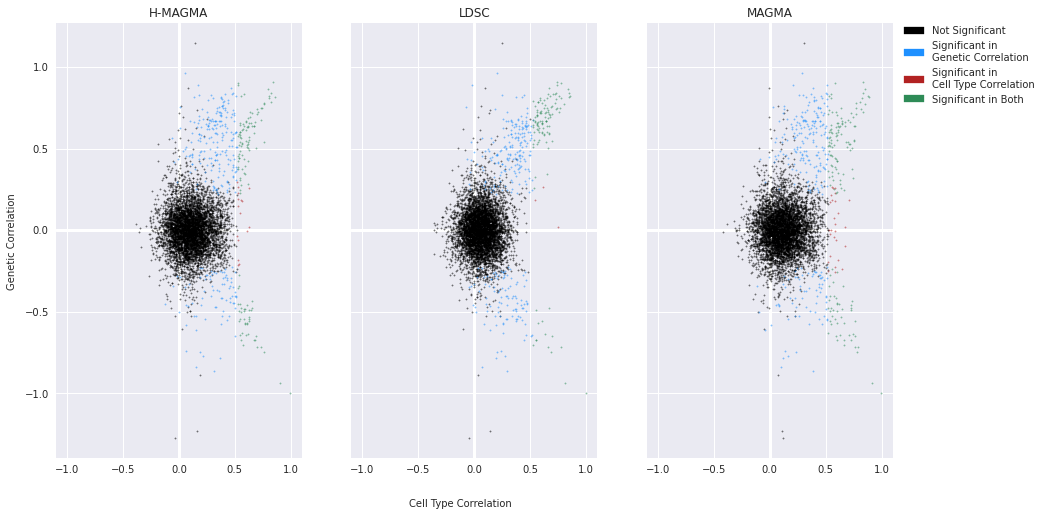

In [30]:
plt.style.use('seaborn')
fig, axes = plt.subplots(1,3,figsize=(15,8), sharey=True)
s = 2
alpha = .5
color_map = {
    'Not Significant' : 'black',
    'Significant in\nGenetic Correlation' : 'dodgerblue',
    'Significant in\nCell Type Correlation' : 'firebrick',
    'Significant in Both' : 'seagreen'
}
ct_thres = corr_df[(corr_df['corr']<0)]['pval'].min()
for ax,m in zip(axes.flatten(),methods):
    merged_corr_m = merged_corr[merged_corr['method']==m]
    threshold = 0.05/merged_corr_m.shape[0]
    not_significant = merged_corr_m[(merged_corr_m['p']>threshold)& # gc not sign and
                                    (merged_corr_m['pval']>ct_thres)] # ct not sign
    gc_significant = merged_corr_m[(merged_corr_m['p']<=threshold)& # gc sign and
                                   (merged_corr_m['pval']>ct_thres)] # ct not sign
    ct_significant = merged_corr_m[(merged_corr_m['p']>threshold)& # gc not sign and
                                   (merged_corr_m['pval']<=ct_thres)] # ct sign 
    both_significant = merged_corr_m[(merged_corr_m['p']<=threshold)& # gc sign and
                                     (merged_corr_m['pval']<=ct_thres)] # ct sign
    ax.scatter(not_significant['corr'],not_significant['rg'], color=color_map['Not Significant'],
               alpha=alpha, s=s)
    ax.scatter(gc_significant['corr'],gc_significant['rg'], color=color_map['Significant in\nGenetic Correlation'],
               alpha=alpha, s=s)
    ax.scatter(ct_significant['corr'],ct_significant['rg'], color=color_map['Significant in\nCell Type Correlation'],
               alpha=alpha, s=s)
    ax.scatter(both_significant['corr'],both_significant['rg'], color=color_map['Significant in Both'],
               alpha=alpha, s=s)
    
    ax.set_xlim(-1.1,1.1)
    ax.set_title(m)
    ax.axhline(0, color='w', lw=3, ls='-', zorder=0)
    ax.axvline(0, color='w', lw=3, ls='-', zorder=0)
#     ax.grid()
fig.text(0.5, 0.04, 'Cell Type Correlation', ha='center')
fig.text(0.08, 0.5, 'Genetic Correlation', va='center', rotation='vertical')
patches = [mpatches.Patch(color=v, label=k) for k,v in color_map.items()]
fig.legend(handles=patches, bbox_to_anchor=(1.04, .89), loc=1, frameon=False)
fig.savefig(f"{figure_dir}genetic_corr_vs_celltype_corr_other_pthresh.png", dpi=200, bbox_inches='tight')
plt.show()

## Figure 9

In [57]:
mri_corr_df = corr_df[(corr_df['gwasx'].str.contains(': \w+\.\w+'))& # only get MRI measurement phenotypes
                          (corr_df['gwasy'].str.contains(': \w+\.\w+'))&
                          ~((corr_df['gwasx'].str.contains('Hippocampus'))| # remove hippocampus volume data
                           corr_df['gwasy'].str.contains('Hippocampus'))
                         ] 
all_mri_gwas = pd.concat([mri_corr_df['gwasx'],mri_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_mri_gwas for m in methods]
mri_corr_df = mri_corr_df.append(pd.DataFrame(diag_df, columns=mri_corr_df.columns))
mri_corr_df = mri_corr_df[mri_corr_df['method']==m]
mri_corr_df = mri_corr_df.pivot(columns='gwasy', index='gwasx', values='corr')
mri_corr_df

gwasy,cortical thickness (adjusted): Cingulate.caudalanteriorcingulate,cortical thickness (adjusted): Cingulate.isthmuscingulate,cortical thickness (adjusted): Cingulate.posteriorcingulate,cortical thickness (adjusted): Cingulate.rostralanteriorcingulate,cortical thickness (adjusted): Cortex.cortex,cortical thickness (adjusted): Frontal.caudalmiddlefrontal,cortical thickness (adjusted): Frontal.frontalpole,cortical thickness (adjusted): Frontal.lateralorbitofrontal,cortical thickness (adjusted): Frontal.medialorbitofrontal,cortical thickness (adjusted): Frontal.paracentral,...,volume: Parietal.supramarginal,volume: Temporal.bankssts,volume: Temporal.entorhinal,volume: Temporal.fusiform,volume: Temporal.inferiortemporal,volume: Temporal.middletemporal,volume: Temporal.parahippocampal,volume: Temporal.superiortemporal,volume: Temporal.temporalpole,volume: Temporal.transversetemporal
gwasx,,,,,,,,,,,,,,,,,,,,,
cortical thickness (adjusted): Cingulate.caudalanteriorcingulate,1.0,0.307745,0.210821,0.391835,-0.040459,0.138372,-0.030693,0.302735,0.252119,-0.018576,...,0.128770,0.130316,0.164747,0.121906,0.268656,0.201381,0.162091,0.244205,-0.066679,0.063149
cortical thickness (adjusted): Cingulate.isthmuscingulate,NaN,1.000000,0.210880,0.241359,-0.040695,0.014090,-0.047884,0.212179,0.151519,-0.029616,...,0.247104,0.067696,0.061662,0.046485,0.071706,0.061023,0.233337,0.176631,-0.107099,-0.048607
cortical thickness (adjusted): Cingulate.posteriorcingulate,NaN,NaN,1.000000,0.153867,0.110074,0.007338,0.047565,0.243879,-0.003491,-0.043459,...,0.136415,0.099561,-0.064493,0.041765,0.099165,0.150800,0.345280,0.133602,-0.037189,0.146910
cortical thickness (adjusted): Cingulate.rostralanteriorcingulate,NaN,NaN,NaN,1.000000,0.073341,0.107509,0.083187,0.261501,0.182514,-0.017834,...,-0.061605,0.108669,0.157920,0.133730,0.169880,0.233191,0.162984,0.143815,-0.027055,0.074979
cortical thickness (adjusted): Cortex.cortex,NaN,NaN,NaN,NaN,1.000000,-0.052533,0.116708,-0.062986,-0.008068,-0.046480,...,0.054425,0.009842,0.083278,0.002237,0.084626,-0.002484,0.148908,0.034654,0.177102,0.051102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volume: Temporal.middletemporal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.094861,0.168866,-0.063715,0.117435
volume: Temporal.parahippocampal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.068777,0.043104,0.098777
volume: Temporal.superiortemporal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.050774,0.162575


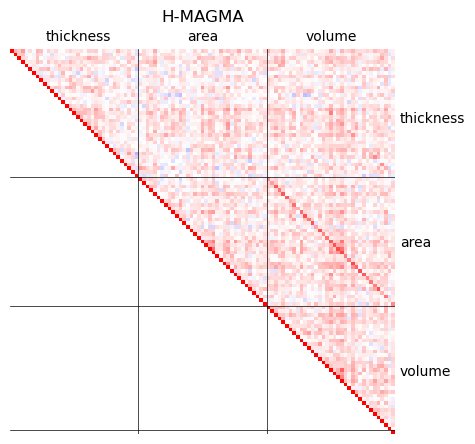

In [70]:
plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize=(5,5))
for m in ['H-MAGMA']:
    mri_corr_df = corr_df[(corr_df['gwasx'].str.contains(': \w+\.\w+'))& # only get MRI measurement phenotypes
                          (corr_df['gwasy'].str.contains(': \w+\.\w+'))&
                          ~((corr_df['gwasx'].str.contains('Hippocampus'))| # remove hippocampus volume data
                           corr_df['gwasy'].str.contains('Hippocampus'))
                         ] 
    all_mri_gwas = pd.concat([mri_corr_df['gwasx'],mri_corr_df['gwasy']]).unique()
    diag_df = [[g,g,1,0,m] for g in all_mri_gwas for m in methods]
    mri_corr_df = mri_corr_df.append(pd.DataFrame(diag_df, columns=mri_corr_df.columns))
    mri_corr_df = mri_corr_df[mri_corr_df['method']==m]
    mri_corr_df = mri_corr_df.pivot(columns='gwasy', index='gwasx', values='corr')
    ax.imshow(mri_corr_df,
              cmap='bwr', vmin=-1, vmax=1)
    ax.set_title(m)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
##     yticks = mri_corr_df.index.str.split(':').str[0].str.split(' ').str[-1].to_list()
    yticks = mri_corr_df.index.str.split(':').str[0].str.split('(').str[0].str.rstrip().str.split(' ').str[-1]
    ticks = ['']*len(yticks)
    for group in set(yticks):
        start = False
        end = False
        for i,tick in enumerate(yticks):
            if tick==group and start==False:
                start = i
            if start and tick!=group:
                end = i
                break
        if end == False:
            end = i
#         ax.axvline(end, color='k', lw=0.5)
        ax.axhline(end-.5, color='k', lw=0.5)
        mid = int((end+start)/2)   
    #     print(group, start, end, mid)
        ticks[mid] = group
    ax.axvline(35-.5, color='k', lw=0.5)
    ax.axvline(70-.5, color='k', lw=0.5)
    ax.yaxis.tick_right()
    ax.set_yticks(list(range(0,mri_corr_df.shape[0])))
    ax.set_yticklabels(ticks)
    ax.xaxis.tick_top()
    ax.set_xticks(list(range(0,mri_corr_df.shape[0])))
    ax.set_xticklabels(ticks)
#     break
    plt.show()
# plt.tight_layout()


In [ ]:
from statsmodels.stats.multitest import multipletests
import numpy as np

temp = corr_df.copy()
# display(temp)
temp['pval'] = multipletests(temp['pval'].values, method='bonferroni')[1]
temp = temp[(temp['pval']<=0.05)
     &(temp['corr']<0)
    ].sort_values('corr').groupby(['gwasx','gwasy']).agg(list)

temp['N_method'] = temp['method'].apply(lambda row: len(row))
temp['mean_corr'] = temp['corr'].apply(lambda row: np.mean(row))
display(temp[temp['N_method']>2].reset_index().drop(columns='pval').sort_values('mean_corr'))
# temp[temp['corr'] < 0] = 0
# temp.hist(bins=100)

temp_list = temp[temp['N_method']>2].reset_index().drop(columns='pval').sort_values('mean_corr')[['gwasx','gwasy']].values.tolist()

In [ ]:
def make_name(string):
    return string.replace(':','_')

In [ ]:
# scatter plot of GWAS 'a' and with all other significant correlated GWASes ('b')
from adjustText import adjust_text
methods = constants.METHODS
method_color = {'H-MAGMA':'#4A148C',
                'LDSC':'#CE93D8',
                'MAGMA':'#9C27B0'}
pval_correction = constants.PVAL_CORRECTION
plot_annots = True
plt.style.use('seaborn')
tot_i = len(temp_list)*len(methods)
i = 1
for a,b in temp_list:
    for m in methods:
        print(f"{i}/{tot_i}")
        i += 1
        plot_name = f'{figure_dir}scatter_plots/{make_name(a)}_{make_name(b)}_{m}.png'
        if not os.path.exists(plot_name):
            fig, ax = plt.subplots(figsize=(7,7))
            cy = 'blue'
            cx = 'red'
            ax.axhline(0, color='white', zorder=0, lw=3)
            ax.axvline(0, color='white', zorder=0, lw=3)
    #         ax.axline(xy1=(0,0), slope=-1, color='white', zorder=0, lw=3)
            x,y = [df_all[(df_all.gwas==j)&(df_all.method==m).copy()]
                   for j in [a,b]]
            ax.scatter(x.beta, y.beta, label=m, color=method_color[m], alpha=.4)

            x = x.assign(sign = lambda x: (x[f'pvalue_{pval_correction}'] <= 0.05))
            y = y.assign(sign = lambda x: (x[f'pvalue_{pval_correction}'] <= 0.05))
            #             x['sign'] = (x[f'pvalue_{pval_correction}'] <= 0.05)
            #             y['sign'] = (y[f'pvalue_{pval_correction}'] <= 0.05)

            # is really slow because of the annotations
            if plot_annots:
                texts_xy = [ax.annotate(annot, (x.beta.iat[l], y.beta.iat[l]),color='green',fontsize=8)
                         for l,annot in enumerate(x.annotation) if x.sign.iat[l] and y.sign.iat[l]]
                texts_x = [ax.annotate(annot, (x.beta.iat[l], y.beta.iat[l]),color=cx,fontsize=8)
                         for l,annot in enumerate(x.annotation) if x.sign.iat[l] and not y.sign.iat[l] ]
                texts_y = [ax.annotate(annot, (x.beta.iat[l], y.beta.iat[l]),color=cy,fontsize=8)
                         for l,annot in enumerate(y.annotation) if y.sign.iat[l] and not x.sign.iat[l] ]
                adjust_text(texts_xy+texts_x+texts_y, lim=100, arrowprops=dict(arrowstyle='->', color='black'))

            # print(f'Plot {i+1}/{len(b_list)}...')
            plt.title(m)

            ax.set_xlabel(a, fontsize=10, color=cx)
            ax.set_ylabel(b, fontsize=10, color=cy)

            corr_val = corr_df[(((corr_df['gwasx']==a)&(corr_df['gwasy']==b))
                               |
                               ((corr_df['gwasx']==b)&(corr_df['gwasy']==a)))
                               &
                               (corr_df['method']==m)
                              ]['corr'].values
            ax.text(0.12, 0.97, f'Cell-type Correlation  = {float(corr_val):.2f}', horizontalalignment='center',
                 verticalalignment='center', transform = ax.transAxes, size=7)
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            min_value = min(min(x.beta),min(y.beta)) * 1.1
            max_value = max(max(x.beta),max(y.beta)) * 1.1
            ax.set_ylim(min_value,max_value)
            ax.set_xlim(min_value,max_value)
            # Path(f"{out_dir}correlation_{make_filename(a)}").mkdir(parents=True, exist_ok=True)
            plt.savefig(plot_name,
                        dpi=200, bbox_inches='tight')
    #         plt.show()
            plt.close(fig)
    #         break
    #     break

In [ ]:
for gwas_group,keywords in gwas_group_dict.items():
    regex_keywords = '|'.join(keywords)
    df_group = df_all[df_all['gwas'].str.contains(regex_keywords)]
    df_group_sign = df_group[(df_group[f"pvalue_{pval_correction}"]<0.05)]
    display(df_group_sign)
    break
